# Assingment - Text Classification
# Predicitng Gender in Sinhala names
### Kavishka Gamage -17000475

## Import Modules

In [122]:
from __future__ import unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

%matplotlib inline

# set matplotlib font to visualize sinhala font in plots
# import matplotlib as mpl
# import matplotlib.font_manager as font_manager

# path = 'C:/Users/Kavishka/anaconda3/Library/share/fonts/Nirmala.ttf'
# prop = font_manager.FontProperties(fname=path)
# mpl.rcParams['font.family'] = prop.get_name()

## Create dataframe 

In [6]:
# read feamale names from text file and read it to a dataframe
female_names = pd.read_csv('female.txt',sep='\n',header = None, names =['Name'])
female_names['Gender'] = 'F'
print(len(female_names))
female_names.head(n=10)

211


,Name,Gender
0,පතිනි,F
1,ගයංගා,F
2,දිනිඳි,F
3,ජිත්මි,F
4,දෙව්මිණි,F
5,දිල්හානි,F
6,වත්සලා,F
7,ලතා,F
8,චූලනී,F
9,දර්ශනී,F


In [7]:
# read male names from text file and read it to a dataframe
male_names = pd.read_csv('male.txt',sep='\n',header = None, names =['Name'])
male_names['Gender'] = 'M'
print(len(male_names))
male_names.head(n=10)

246


,Name,Gender
0,චමුදිත,M
1,එඩ්වඩ්,M
2,ජයදේශ,M
3,ක්‍රිෂාන්ත,M
4,චතුර,M
5,ධර්මදාස,M
6,චන්දන,M
7,මොහිදීන්,M
8,මධුසංඛ,M
9,කමල්,M


In [252]:
# Concatenate two dataframe
df = pd.concat([female_names,male_names],axis=0,ignore_index = True)
print(len(df))
df.tail()

457


,Name,Gender
452,ස්ටැන්ලි,M
453,කීර්ති,M
454,විශ්වා,M
455,ආත්මා,M
456,ගාමිණී,M


## Explore dataset

In [9]:
# check for duplications of names
df.duplicated('Name').sum()
df[df.duplicated('Name')]

,Name,Gender


### Gender distribution

In [15]:
# Gender count
df.groupby(['Gender'])['Gender'].describe()[['count']]

,count
Gender,
F,211
M,246


M    53.829322
F    46.170678
Name: Gender, dtype: float64

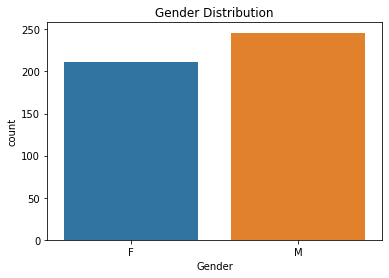

In [16]:
sns.countplot(x='Gender', data=df).set_title('Gender Distribution')
df['Gender'].value_counts(normalize=True) * 100

### Length of name of Females and males

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A0F11A7148>,
      dtype=object)

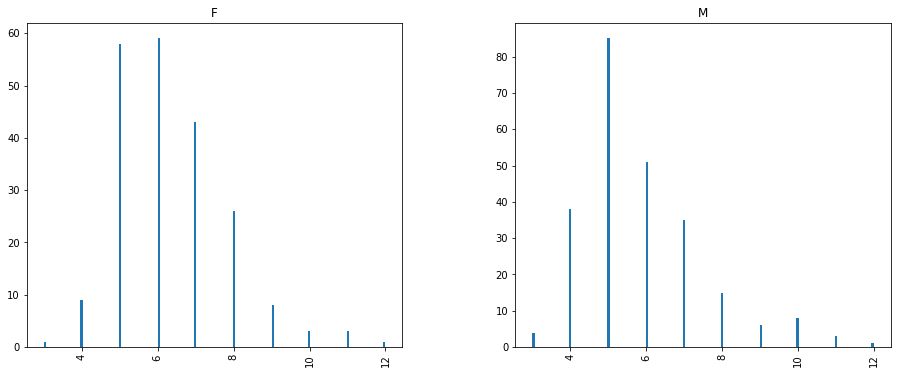

In [253]:
df['Length'] = df['Name'].apply(len)
df.hist(column='Length',by=df['Gender'],figsize=(15,6), bins=150)

Both Female and Male name length frequency looks like simlilar. 

Here character count is different from sinhala character count. It count each nicode character which use to represent sinhala letter's allapilla, papilla etc.

### Distribution of name length in gender

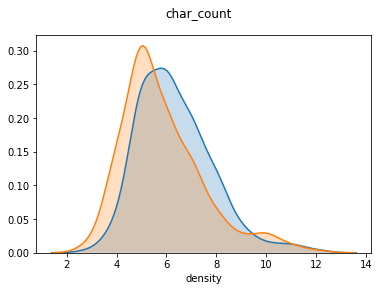

In [11]:

female = df.loc[df['Gender']=='F','Length']
male = df.loc[df['Gender']=='M','Length']
 
fig, ax = plt.subplots()
fig.suptitle('char_count',fontsize=12)
for i in [female,male]:
    #sns.distplot(i, ax=ax, kde=False)
    sns.distplot(i, hist=False, kde=True, kde_kws={"shade":True}, axlabel="density",ax=ax)
     

### Count Frequency of last one / two/ three letters

In [23]:
from collections import Counter


results = Counter()
df['Name'].apply(results.update)

most = results.most_common()
print(most[:10])

[('්', 313), ('ි', 295), ('න', 236), ('ා', 226), ('ර', 172), ('ම', 134), ('ල', 123), ('ස', 107), ('ද', 105), ('ක', 105)]


In [26]:
# character frequency of Female names
from collections import Counter

results = Counter()
df[df['Gender']=='F']['Name'].apply(results.update)

most = results.most_common()
print(most[:10])

[('ි', 174), ('ා', 159), ('්', 103), ('න', 102), ('ර', 78), ('ම', 76), ('ල', 57), ('ක', 51), ('ස', 46), ('ද', 42)]


In [27]:
#  Character frequency of male names
from collections import Counter


results = Counter()
df[df['Gender']=='M']['Name'].apply(results.update)

most = results.most_common()
print(most[:10])

[('්', 210), ('න', 134), ('ි', 121), ('ර', 94), ('ා', 67), ('ු', 66), ('ල', 66), ('ද', 63), ('ත', 61), ('ස', 61)]


## Build Features

In [254]:
# get last character of name
df['Last_letter'] = [ x[-2:] for x in df['Name']]
df.head()

,Name,Gender,Length,Last_letter
0,පතිනි,F,5,නි
1,ගයංගා,F,5,ගා
2,දිනිඳි,F,6,ඳි
3,ජිත්මි,F,6,මි
4,දෙව්මිණි,F,8,ණි


In [255]:
# get last two characters of name
df['Last_2_letter'] = [ x[-4:] for x in df['Name']]
df.head()

,Name,Gender,Length,Last_letter,Last_2_letter
0,පතිනි,F,5,නි,තිනි
1,ගයංගා,F,5,ගා,යංගා
2,දිනිඳි,F,6,ඳි,නිඳි
3,ජිත්මි,F,6,මි,ත්මි
4,දෙව්මිණි,F,8,ණි,මිණි


In [257]:
# last syllabul we pronounce is most of the time differetiate from sinhala Female and male names
# checking this features impact
df['Last_phoneme'] = [ x[-1] for x in df['Name']]
df.head()

,Name,Gender,Length,Last_letter,Last_2_letter,Last_phoneme
0,පතිනි,F,5,නි,තිනි,ි
1,ගයංගා,F,5,ගා,යංගා,ා
2,දිනිඳි,F,6,ඳි,නිඳි,ි
3,ජිත්මි,F,6,මි,ත්මි,ි
4,දෙව්මිණි,F,8,ණි,මිණි,ි


In [15]:
def character_mean(name):
    """
    ord() function return integer representation of unicode code of a character pass to it.
    """
    character_list = [ord(x) for x in name]
    return np.array(character_list).mean()

In [258]:
## encoding to numerical representation

df['Last_phoneme_value'] = df['Last_phoneme'].apply(lambda x: ord(x))
df['Last_letter_value'] = df['Last_letter'].apply(lambda x: character_mean(x).round(3))
df['Last_2_letter_value'] = df['Last_2_letter'].apply(lambda x: character_mean(x).round(3))
df['Name_value'] = df['Name'].apply(lambda x: character_mean(x).round(3))
df['Label'] = df['Gender'].apply(lambda x: 1 if x=='F' else 0)  # 1 for Female and 0 for Male
df.head()

,Name,Gender,Length,Last_letter,Last_2_letter,Last_phoneme,Last_phoneme_value,Last_letter_value,Last_2_letter_value,Name_value,Label
0,පතිනි,F,5,නි,තිනි,ි,3538,3521.5,3520.50,3518.000,1
1,ගයංගා,F,5,ගා,යංගා,ා,3535,3509.5,3497.75,3495.000,1
2,දිනිඳි,F,6,ඳි,නිඳි,ි,3538,3522.5,3522.00,3521.500,1
3,ජිත්මි,F,6,මි,ත්මි,ි,3538,3525.0,3520.25,3518.167,1
4,දෙව්මිණි,F,8,ණි,මිණි,ි,3538,3518.5,3521.75,3523.125,1


In [127]:
# complete feature set to feed to models
feature_set = df[['Name_value','Length','Last_phoneme_value','Last_letter_value','Last_2_letter_value']]
Y= df['Label']
feature_set

,Name_value,Length,Last_phoneme_value,Last_letter_value,Last_2_letter_value
0,3518.000,5,3538,3521.5,3520.50
1,3495.000,5,3535,3509.5,3497.75
2,3521.500,6,3538,3522.5,3522.00
3,3518.167,6,3538,3525.0,3520.25
4,3523.125,8,3538,3518.5,3521.75
...,...,...,...,...,...
452,3521.750,8,3538,3527.5,3522.50
453,3517.500,6,3538,3519.5,3521.00
454,3527.333,6,3535,3527.5,3526.50
455,3508.000,5,3535,3523.5,3519.50


## ML Classifiers

In [107]:
def result(y_test, y_pred):
    """ print classification report, confusion matrix and return evaluation matrix (micro average values) """
    classes = np.unique(y_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred,average='micro')
    recall = metrics.recall_score(y_test, y_pred,average='micro')
    f1_score = metrics.f1_score(y_test, y_pred,average='micro')
    print(metrics.classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(xlabel="Predicted", ylabel="Actual", xticklabels=classes,
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.show()

    return (accuracy, f1_score, recall, precision, auc)

### Logistic Regression Model

In [216]:
def lr(X_train,Y_train,X_test):
    lr = LogisticRegression(random_state=42)
    print(X_train.shape)
    lr.fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)
    return Y_pred,lr

### Support Vector Classifier

In [217]:
def svc_model(X_train,Y_train,X_test):
    svc = SVC(kernel='linear')
    svc.fit(X_train,Y_train)
    Y_pred = svc.predict(X_test)
    return Y_pred,svc

In [29]:
# Input data - This dataset consisit of ordinal values.
feature_dict = {'Name_value':df['Name_value'],'Length':df['Length'],'Last_phoneme_value':df['Last_phoneme_value'],'Last_letter_value':df['Last_letter_value'],'Last_2_letter_value':df['Last_2_letter_value']}
Y = df['Label']


## Results

### Evaluate individaul Feature performence

In [112]:
def feature_evlaluation(feature_dict,Y,model,model_name):
    
    final_result = pd.DataFrame(columns =['Accuracy','F1-score','Recall','Precision','AUC'])
    for feature_name,X in feature_dict.items():
        print("====",feature_name,' - ',model_name,"====")
        X_train, X_test, Y_train, Y_test = train_test_split( X.values.reshape(-1,1), Y, test_size=0.3, random_state=42)
       #scalling features
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_text = scaler.transform(X_test)
        Y_pred,m = model(X_train,Y_train,X_test)
        accuracy,f1_score,recall,precision,auc = result(Y_test,Y_pred)
        final_result.loc[model_name+'_'+ feature_name] = [accuracy,f1_score,recall,precision,auc]
    return final_result    
        

### Without scalling

==== Name_value  -  lr ====
(319, 1)
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        68
           1       0.00      0.00      0.00        70

    accuracy                           0.49       138
   macro avg       0.25      0.50      0.33       138
weighted avg       0.24      0.49      0.33       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


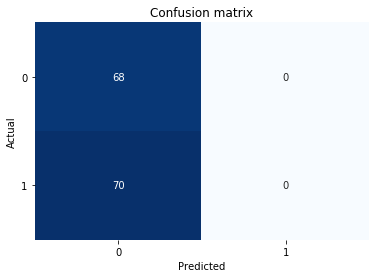

==== Length  -  lr ====
(319, 1)
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        68
           1       0.46      0.34      0.39        70

    accuracy                           0.46       138
   macro avg       0.46      0.47      0.46       138
weighted avg       0.46      0.46      0.46       138



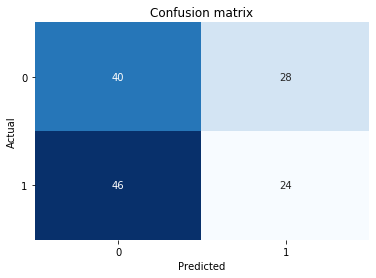

==== Last_phoneme_value  -  lr ====
(319, 1)
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        68
           1       0.00      0.00      0.00        70

    accuracy                           0.49       138
   macro avg       0.25      0.50      0.33       138
weighted avg       0.24      0.49      0.33       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


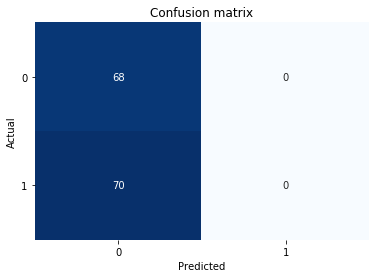

==== Last_letter_value  -  lr ====
(319, 1)
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        68
           1       0.00      0.00      0.00        70

    accuracy                           0.49       138
   macro avg       0.25      0.50      0.33       138
weighted avg       0.24      0.49      0.33       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


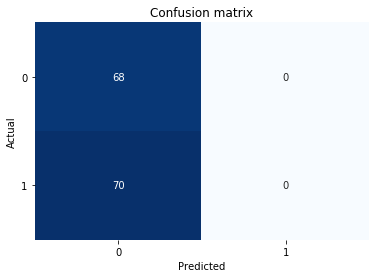

==== Last_2_letter_value  -  lr ====
(319, 1)
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        68
           1       0.00      0.00      0.00        70

    accuracy                           0.49       138
   macro avg       0.25      0.50      0.33       138
weighted avg       0.24      0.49      0.33       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


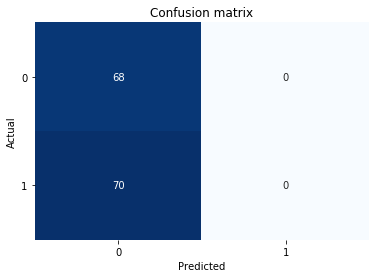

,Accuracy,F1-score,Recall,Precision,AUC
lr_Name_value,0.492754,0.492754,0.492754,0.492754,0.500000
lr_Length,0.463768,0.463768,0.463768,0.463768,0.465546
lr_Last_phoneme_value,0.492754,0.492754,0.492754,0.492754,0.500000
lr_Last_letter_value,0.492754,0.492754,0.492754,0.492754,0.500000
lr_Last_2_letter_value,0.492754,0.492754,0.492754,0.492754,0.500000


In [111]:
# evaluate logistic regression-feature combinations
result_lr = feature_evlaluation(feature_dict,df['Label'],lr,'lr')
result_lr

Individual features doesn't work no better than random prediction generator

### With scalling

==== Name_value  -  lr ====
(319, 1)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.51      1.00      0.67        70

    accuracy                           0.51       138
   macro avg       0.25      0.50      0.34       138
weighted avg       0.26      0.51      0.34       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


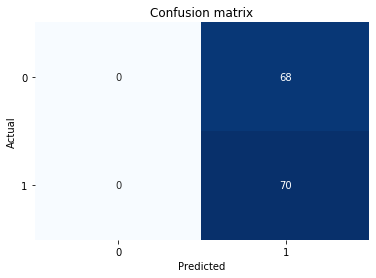

==== Length  -  lr ====
(319, 1)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.51      1.00      0.67        70

    accuracy                           0.51       138
   macro avg       0.25      0.50      0.34       138
weighted avg       0.26      0.51      0.34       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


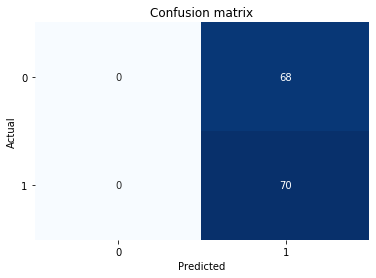

==== Last_phoneme_value  -  lr ====
(319, 1)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.51      1.00      0.67        70

    accuracy                           0.51       138
   macro avg       0.25      0.50      0.34       138
weighted avg       0.26      0.51      0.34       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


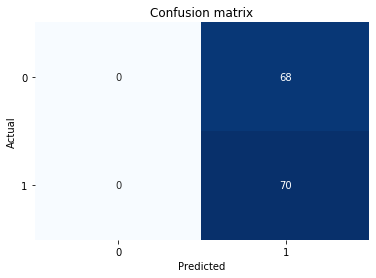

==== Last_letter_value  -  lr ====
(319, 1)
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        68
           1       0.00      0.00      0.00        70

    accuracy                           0.49       138
   macro avg       0.25      0.50      0.33       138
weighted avg       0.24      0.49      0.33       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


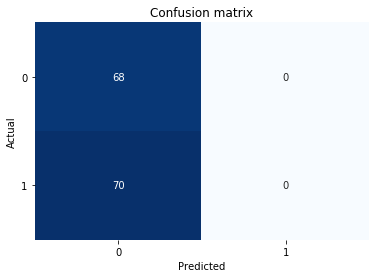

==== Last_2_letter_value  -  lr ====
(319, 1)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.51      1.00      0.67        70

    accuracy                           0.51       138
   macro avg       0.25      0.50      0.34       138
weighted avg       0.26      0.51      0.34       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


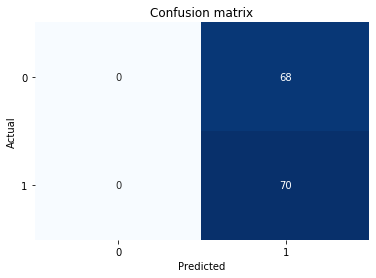

,Accuracy,F1-score,Recall,Precision,AUC
lr_Name_value,0.507246,0.507246,0.507246,0.507246,0.5
lr_Length,0.507246,0.507246,0.507246,0.507246,0.5
lr_Last_phoneme_value,0.507246,0.507246,0.507246,0.507246,0.5
lr_Last_letter_value,0.492754,0.492754,0.492754,0.492754,0.5
lr_Last_2_letter_value,0.507246,0.507246,0.507246,0.507246,0.5


In [113]:
# evaluate logistic regression-feature combinations

result_lr_scale = feature_evlaluation(feature_dict,df['Label'],lr,'lr')
result_lr_scale

There is a performence improvement after we used min max scaler. Huge value range difference of length and other features might be the cause.

### SVC Results with respect to individual scalled features

==== Name_value  -  svc ====
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.51      1.00      0.67        70

    accuracy                           0.51       138
   macro avg       0.25      0.50      0.34       138
weighted avg       0.26      0.51      0.34       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


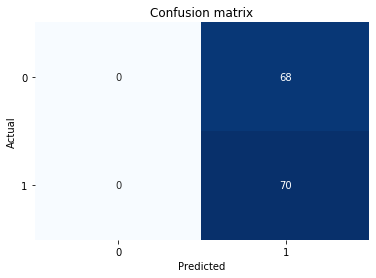

==== Length  -  svc ====
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.51      1.00      0.67        70

    accuracy                           0.51       138
   macro avg       0.25      0.50      0.34       138
weighted avg       0.26      0.51      0.34       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


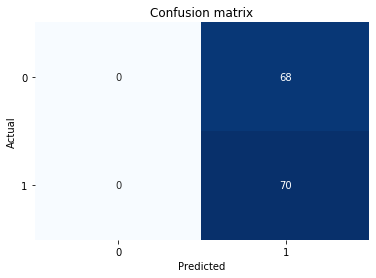

==== Last_phoneme_value  -  svc ====
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.51      1.00      0.67        70

    accuracy                           0.51       138
   macro avg       0.25      0.50      0.34       138
weighted avg       0.26      0.51      0.34       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


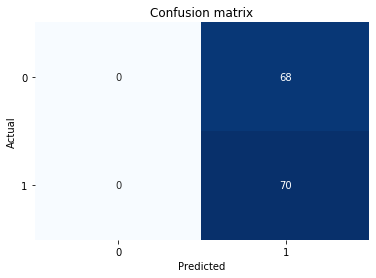

==== Last_letter_value  -  svc ====
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        68
           1       0.00      0.00      0.00        70

    accuracy                           0.49       138
   macro avg       0.25      0.50      0.33       138
weighted avg       0.24      0.49      0.33       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


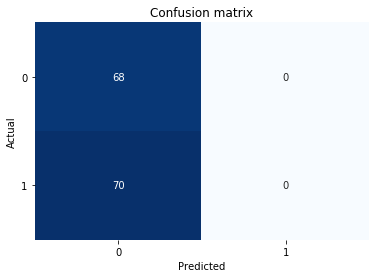

==== Last_2_letter_value  -  svc ====
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.51      1.00      0.67        70

    accuracy                           0.51       138
   macro avg       0.25      0.50      0.34       138
weighted avg       0.26      0.51      0.34       138



C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


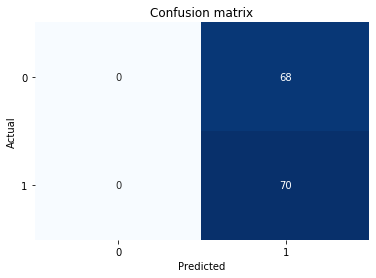

,Accuracy,F1-score,Recall,Precision,AUC
svc_Name_value,0.507246,0.507246,0.507246,0.507246,0.5
svc_Length,0.507246,0.507246,0.507246,0.507246,0.5
svc_Last_phoneme_value,0.507246,0.507246,0.507246,0.507246,0.5
svc_Last_letter_value,0.492754,0.492754,0.492754,0.492754,0.5
svc_Last_2_letter_value,0.507246,0.507246,0.507246,0.507246,0.5


In [126]:
# evaluate support vector classifer-feature combinations
result_svc = feature_evlaluation(feature_dict,df['Label'],svc_model,'svc')
result_svc

### Evaluate complete feature set performence

In [219]:
def gender_classifier(X,Y,model,model_name):
    
    print("====== ",model_name,"=====")
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=42)
    Y_pred,m = model(X_train,Y_train,X_test)
    accuracy,f1_score,recall,precision,auc = result(Y_test,Y_pred)
    return Y_test,Y_pred,X_test,m

======  Logistinc Regression =====
(319, 5)
              precision    recall  f1-score   support

           0       0.63      0.66      0.65        68
           1       0.66      0.63      0.64        70

    accuracy                           0.64       138
   macro avg       0.65      0.65      0.64       138
weighted avg       0.65      0.64      0.64       138



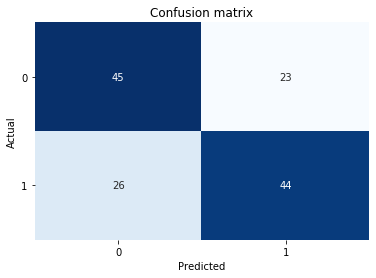

======  Support Vector Classifier =====
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        68
           1       0.87      0.99      0.93        70

    accuracy                           0.92       138
   macro avg       0.93      0.92      0.92       138
weighted avg       0.93      0.92      0.92       138



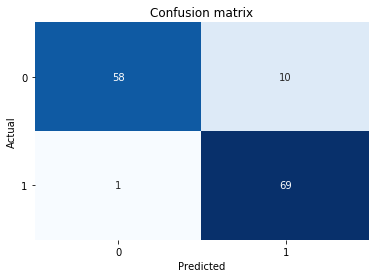

In [220]:
Y_test,Y_pred_lr,X_test,model_lr = gender_classifier(feature_set, Y, lr,'Logistinc Regression')
Y_test,Y_pred_svc,X_test,model_svc = gender_classifier(feature_set, Y, svc_model, "Support Vector Classifier")

Eventhough features in input data individualy didn't give good performence when we give all features as input data both models give high result

## Error Analysis of best classifier

Support Vector Classifer has performed best. It has achived 92% accuracy with combination of all features and 11 misclassified instances. So from here onwards I will be using SVC for modeling

In [209]:

def error_analysis(Y_test,Y_pred,X_test):
    
    df_error = pd.DataFrame(columns=['Name','Length','Last_letter','Last_2_letter','Last_phoneme','Actual','Predicted'])
    i=0
    for idx in X_test.index:
        if Y_pred[i] !=Y_test[idx]:
            df_error.loc[idx] = [df['Name'].iloc[idx], df['Length'].iloc[idx], df['Last_letter'].iloc[idx], df['Last_2_letter'].iloc[idx], df['Last_phoneme'].iloc[idx], Y_test[idx],Y_pred[i]]
        i=i+1
    return df_error

In [210]:
error_analysis(Y_test,Y_pred_svc,X_test)

,Name,Length,Last_letter,Last_2_letter,Last_phoneme,Actual,Predicted
341,රනිඳු,5,ඳු,නිඳු,ු,0,1
447,ෆ්‍රෙඩී,7,ඩී,රෙඩී,ී,0,1
451,පුන්සිරි,8,රි,සිරි,ි,0,1
430,පසිඳු,5,ඳු,සිඳු,ු,0,1
444,ක්‍රිස්ටි,9,ටි,ස්ටි,ි,0,1
209,මානෙල්,6,ල්,නෙල්,්,1,0
448,හෙන්රි,6,රි,න්රි,ි,0,1
442,ඇන්තනී,6,නී,්තනී,ී,0,1
452,ස්ටැන්ලි,8,ලි,න්ලි,ි,0,1
450,තිලකසිරි,8,රි,සිරි,ි,0,1


## Most significant Features

Feature: 0, Score: 0.01188
Feature: 1, Score: 1.07503
Feature: 2, Score: 3.41577
Feature: 3, Score: -0.20766
Feature: 4, Score: -0.00304


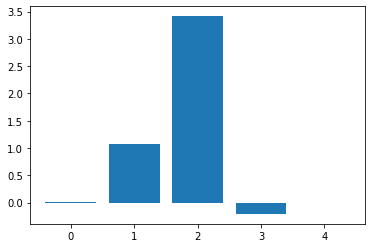

In [221]:
# get importance
importance = model_svc.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00175
Feature: 1, Score: 0.00044
Feature: 2, Score: 0.40919
Feature: 3, Score: 0.00700
Feature: 4, Score: 0.00306


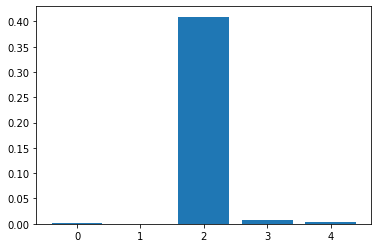

In [222]:
# perform permutation importance
from sklearn.inspection import permutation_importance
results = permutation_importance(model_svc, feature_set, df['Label'], scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Hypothesis of having impact on last syllabul is correct. Feature 2 is last_phoneme feature in the feature set.

Feature 0 which is length of name hasn't considerable impact. This is expected when consider length distribution of Female and male names.

Last character and Last 2 character of names haven't given an impact as expected. Feature representation might be the cause. It would be interesting to check what will happen if we change the representation way of those features as sparse matrix instead of ordinal values.

### Feature extraction for Last Letter of Name (Binary vecotor representation)

In [271]:
# get last letter unique value array
cols = df['Last_letter'].unique()
cols

array(['නි', 'ගා', 'ඳි', 'මි', 'ණි', 'ලා', 'තා', 'නී', 'රි', 'කා', 'ලී',
       'ඛා', 'නා', 'ධි', 'ණී', 'ෂා', 'යා', 'ධා', 'ලි', 'ගි', 'ති', 'රා',
       'පා', 'දි', 'රී', 'කි', 'මා', 'දා', 'ජා', 'වී', 'ලූ', 'තී', 'ණා',
       'ෂි', 'සි', 'සා', 'කේ', 'ල්', 'ම්', 'ිත', 'ඩ්', 'ේශ', '්ත', 'ුර',
       'ාස', 'දන', 'න්', 'ංඛ', 'නක', 'ස්', 'ඳු', 'ික', 'ජු', '්ද', 'ව්',
       'ංග', 'ත්', 'ෝධ', '\u200dෂ', 'තක', 'ංක', '\u200dර', 'ජ්', 'ේෂ',
       'සල', 'ුණ', 'ාර', 'ුල', 'ජය', 'ෂ්', 'යක', 'රද', 'වර', 'රු', 'ිම',
       'ර්', 'ක්', 'ළණ', 'වන', 'ණු', 'ිය', 'ිණ', 'මර', 'ිල', 'ීප', 'දය',
       'ීක', 'රක', 'ීව', 'ප්', '්ක', '්ප', 'චල', 'ධව', 'ෝප', '්ෂ', 'ගර',
       'ශන', 'ඟු', 'ලක', 'ාප', '\u200dය', 'ාල', '්න', 'ිර', 'ුක', 'ෝල',
       'ධර', 'ටි', 'ඩී', 'වා'], dtype=object)

In [288]:
def last_n_letter_feature_vector(col):
    cols = df[col].unique()
    feature_df = pd.DataFrame(columns =cols, index = df.index )
    # initialize as 0
    feature_df[:]=0
    # put 1 when last charcter present
    for i in df.index:
        for j in range(len(cols)):
            if df[col].iloc[i] == cols[j]:
                feature_df.iloc[i,j]=1
    #print(feature_df)
    return feature_df

======   SVC with last character feature vector =====
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        68
           1       0.91      0.87      0.89        70

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138



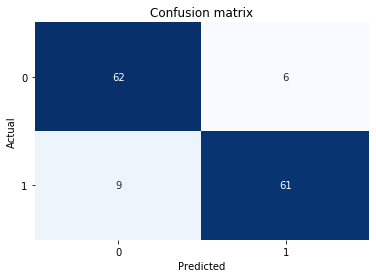

,Name,Length,Last_letter,Last_2_letter,Last_phoneme,Actual,Predicted
155,චාමරී,5,රී,ාමරී,ී,1,0
101,ප්‍රේමා,7,මා,රේමා,ා,1,0
72,ගයත්‍රී,7,රී,්‍රී,ී,1,0
451,පුන්සිරි,8,රි,සිරි,ි,0,1
209,මානෙල්,6,ල්,නෙල්,්,1,0
25,චන්ද්‍රලේඛා,11,ඛා,ලේඛා,ා,1,0
203,මංජුරී,6,රී,ජුරී,ී,1,0
448,හෙන්රි,6,රි,න්රි,ි,0,1
442,ඇන්තනී,6,නී,්තනී,ී,0,1
452,ස්ටැන්ලි,8,ලි,න්ලි,ි,0,1


In [289]:
last_letter_df = last_n_letter_feature_vector('Last_letter')
Y_test,Y_pred_svc2,X_test,model_svc2 = gender_classifier(last_letter_df, df['Label'], svc_model, " SVC with last character feature vector")
error_analysis(Y_test,Y_pred_svc2,X_test)

In [290]:
# feature dataframe
last_letter_df.head()

,නි,ගා,ඳි,මි,ණි,ලා,තා,නී,රි,කා,...,‍ය,ාල,්න,ිර,ුක,ෝල,ධර,ටි,ඩී,වා
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This shows feeding sparse matrix representation of last letter feature individualy gives very high result that ordinal value calculated with ord() function

### Feature extraction for Last two Letters of Name (Binary vecotor representation)

======   SVC with last 2 character feature vector =====
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        68
           1       1.00      0.34      0.51        70

    accuracy                           0.67       138
   macro avg       0.80      0.67      0.63       138
weighted avg       0.80      0.67      0.63       138



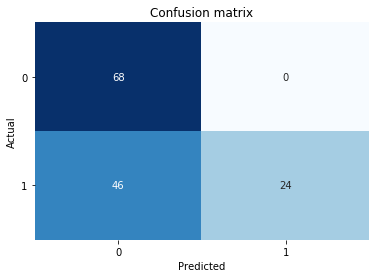

In [296]:
last_2_letter_df = last_n_letter_feature_vector('Last_2_letter')
Y_test,Y_pred_svc3,X_test,model_svc3 = gender_classifier(last_2_letter_df, df['Label'], svc_model, " SVC with last 2 character feature vector")
#error_analysis(Y_test,Y_pred_svc3,X_test)

Last_2_character feature gives less accuracy than last_character feature for SVC model

### Feature extraction for Last syllabul/phoneme of Name (Binary vecotor representation)

======   SVC with last syllabul feature vector =====
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        68
           1       0.90      0.99      0.94        70

    accuracy                           0.93       138
   macro avg       0.94      0.93      0.93       138
weighted avg       0.94      0.93      0.93       138



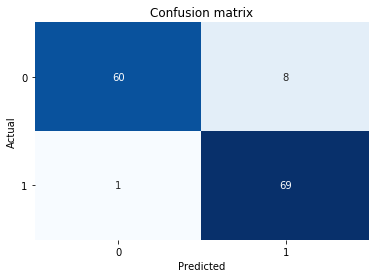

,Name,Length,Last_letter,Last_2_letter,Last_phoneme,Actual,Predicted
447,ෆ්‍රෙඩී,7,ඩී,රෙඩී,ී,0,1
451,පුන්සිරි,8,රි,සිරි,ි,0,1
444,ක්‍රිස්ටි,9,ටි,ස්ටි,ි,0,1
209,මානෙල්,6,ල්,නෙල්,්,1,0
448,හෙන්රි,6,රි,න්රි,ි,0,1
442,ඇන්තනී,6,නී,්තනී,ී,0,1
452,ස්ටැන්ලි,8,ලි,න්ලි,ි,0,1
450,තිලකසිරි,8,රි,සිරි,ි,0,1
438,කිංස්ලි,7,ලි,ස්ලි,ි,0,1


In [297]:
last_phoneme_df = last_n_letter_feature_vector('Last_phoneme')
Y_test,Y_pred_svc4,X_test,model_svc4 = gender_classifier(last_phoneme_df, df['Label'], svc_model, " SVC with last syllabul feature vector")
error_analysis(Y_test,Y_pred_svc4,X_test)

Last Sinhala syllabul/Phoneme in vector representation gives highest accuracy with least number of misclassified instances. It surpass the previously used feature combination dataset by 1%.
